# Link for the dataset :
https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis

# Importing libraries

In [58]:
# Data manipulation and analysis
import pandas as pd

# PyTorch for building and training the neural network
import torch
import torch.nn as nn
import torch.optim as optim

# Scikit-learn for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split  # Splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scaling numerical features and one-hot encoding categorical features
from sklearn.compose import ColumnTransformer  # Applying different preprocessing steps to different feature columns

# Visualization
import seaborn as sns  # Creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # Plotting graphs and figures

# Interactive widgets for Jupyter Notebooks
import ipywidgets as widgets  # Creating interactive widgets
from IPython.display import display, clear_output  # Displaying and clearing outputs in Jupyter Notebooks

# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix  # Calculating accuracy and creating a confusion matrix for model evaluation


# Reading the data and displaying the head 

In [36]:
df = pd.read_csv("diabetes_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


# Plotting the charts

In [51]:
def plot_feature(feature):
    plt.figure(figsize=(5,5))
    df[feature].hist(bins=35)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

dropdown = widgets.Dropdown(options=df.columns, description='Feature:')
widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('Age', 'Gender', 'Ethnicity', 'SocioeconomicSt…

# Displaying the columns and the length of the data

In [37]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [38]:
len(df)

1879

# Seeing if the data has null values

In [52]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins                          0
AntidiabeticMedicati

# Displaying the heat maps

In [39]:
demographic_details_columns = ['Age','Gender','Ethnicity','SocioeconomicStatus','EducationLevel']

lifestyle_factors_columns = ['BMI','Smoking','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality']

medical_history_columns = ['FamilyHistoryDiabetes','GestationalDiabetes','PolycysticOvarySyndrome','PreviousPreDiabetes','Hypertension']

clinical_measurements_columns = ['SystolicBP','DiastolicBP','FastingBloodSugar','HbA1c','SerumCreatinine','BUNLevels','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides']

medications_columns = ['AntihypertensiveMedications','Statins','AntidiabeticMedications']

symptoms_and_quality_of_life_columns = ['FrequentUrination','ExcessiveThirst','UnexplainedWeightLoss','FatigueLevels','BlurredVision','SlowHealingSores','TinglingHandsFeet','QualityOfLifeScore']

environmental_and_occupational_exposures_columns= ['HeavyMetalsExposure','OccupationalExposureChemicals','WaterQuality']

health_behaviors_columns = ['MedicalCheckupsFrequency','MedicationAdherence','HealthLiteracy']

In [55]:
column_groups = {
    'Demographic Details': demographic_details_columns,
    'Lifestyle Factors': lifestyle_factors_columns,
    'Medical History': medical_history_columns,
    'Clinical Measurements': clinical_measurements_columns,
    'Medications': medications_columns,
    'Symptoms and Quality of Life': symptoms_and_quality_of_life_columns,
    'Environmental and Occupational Exposures': environmental_and_occupational_exposures_columns,
    'Health Behaviors': health_behaviors_columns
}

# Function to plot heatmap for a given set of columns
def plot_heatmap(group_name):
    columns = column_groups[group_name]
    
    # Ensure columns are in the dataframe
    cols_to_plot = [col for col in columns if col in df.columns]
    
    if not cols_to_plot:
        print(f"No columns from {group_name} found in the DataFrame.")
        return
    
    # Calculate the correlation matrix
    corr = df[cols_to_plot + ['Diagnosis']].corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap: {group_name}')
    plt.show()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=column_groups.keys(),
    description='Column Group:',
    style={'description_width': 'initial'}
)

# Create an output widget
output = widgets.Output()

# Define the event handler function
def on_dropdown_change(change):
    with output:
        clear_output(wait=True)
        plot_heatmap(change['new'])

# Attach the event handler to the dropdown
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget and output widget
display(dropdown, output)

# Initialize with the first group's heatmap
with output:
    plot_heatmap(list(column_groups.keys())[0])


Dropdown(description='Column Group:', options=('Demographic Details', 'Lifestyle Factors', 'Medical History', …

Output()

# Displaying the correlations

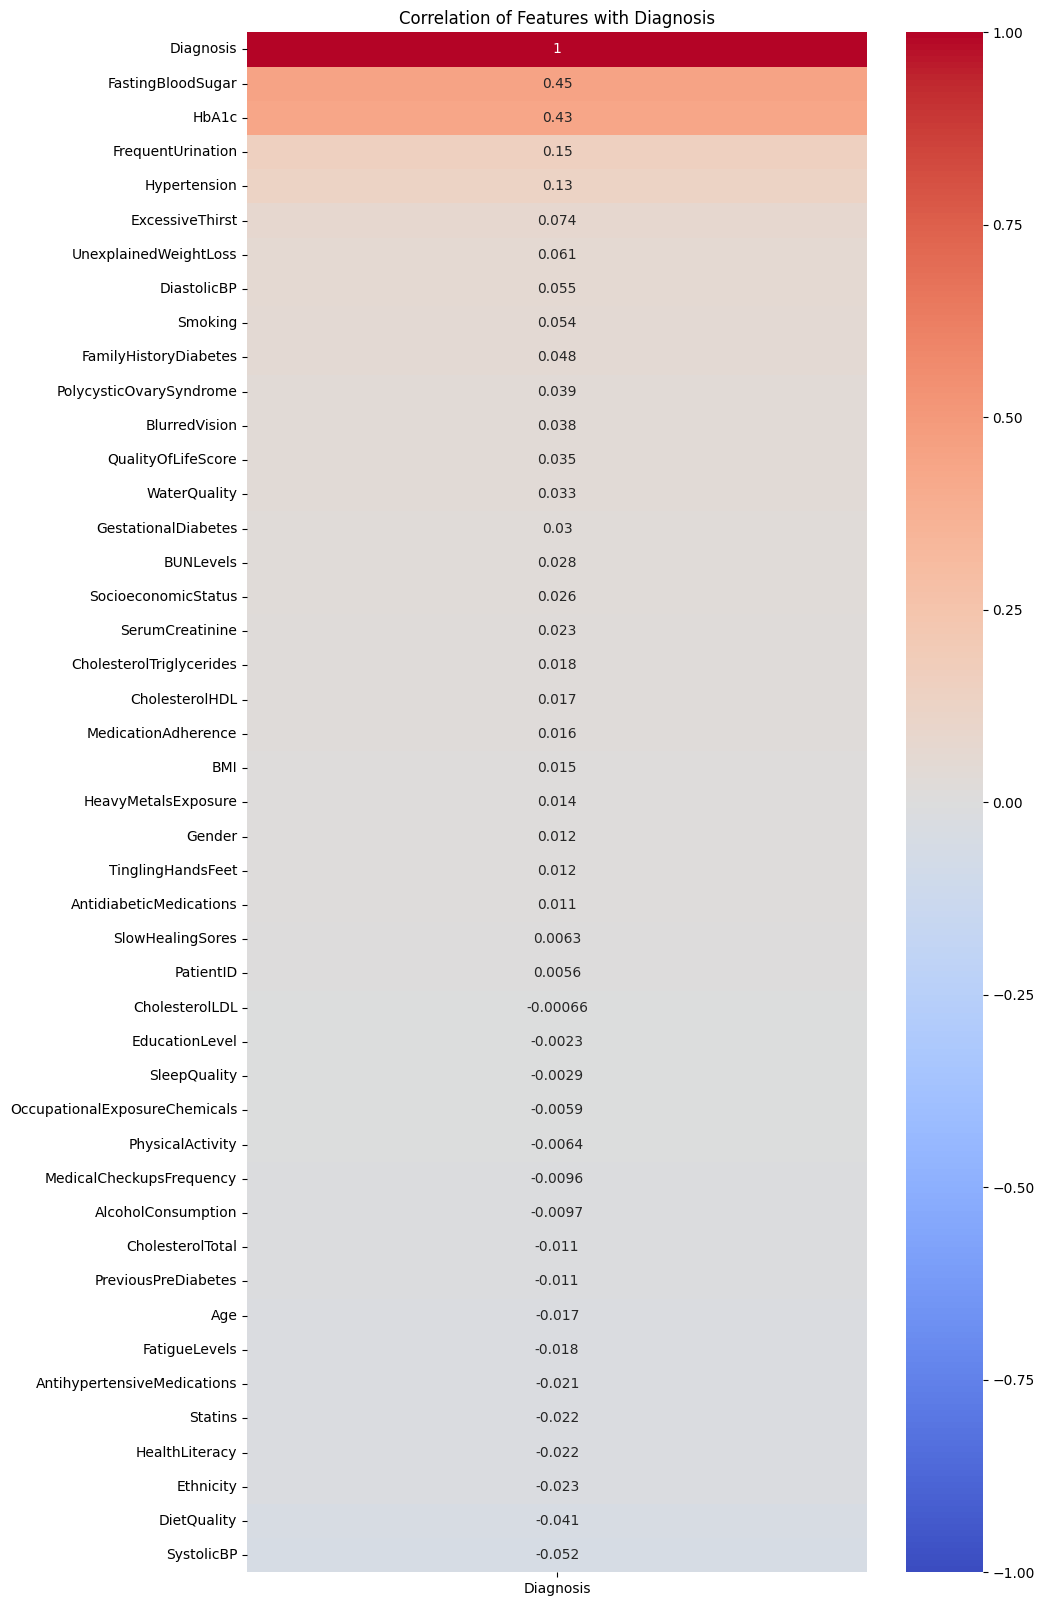

In [13]:
# For correlation, we need to convert categorical variables to numerical
data_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlations with the target variable "Diagnosis"
correlations = data_encoded.corr()['Diagnosis'].sort_values(ascending=False)

# Plotting the heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(data_encoded.corr()[['Diagnosis']].sort_values(by='Diagnosis', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Diagnosis')
plt.show()

# Machine learning

Epoch [10/100], Loss: 0.6729
Epoch [20/100], Loss: 0.6382
Epoch [30/100], Loss: 0.5964
Epoch [40/100], Loss: 0.5410
Epoch [50/100], Loss: 0.4741
Epoch [60/100], Loss: 0.4036
Epoch [70/100], Loss: 0.3412
Epoch [80/100], Loss: 0.2947
Epoch [90/100], Loss: 0.2588
Epoch [100/100], Loss: 0.2272
Train Accuracy: 0.9255
Test Accuracy: 0.8324


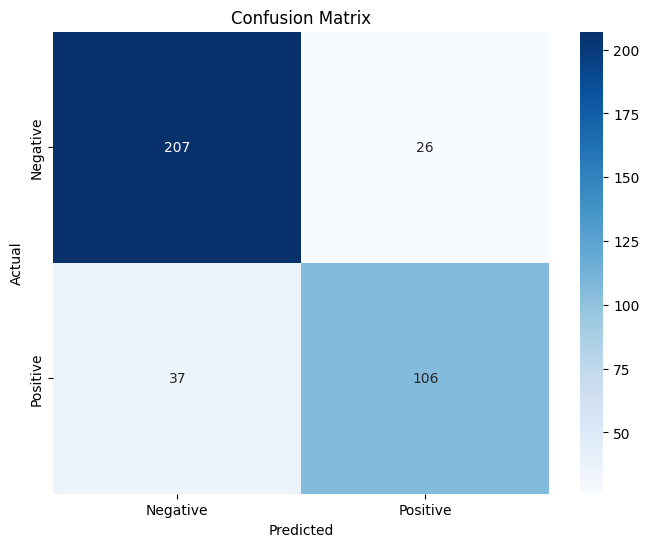

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Drop irrelevant columns
# df = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Identify categorical and numerical columns
categorical_features = ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel']
numerical_features = df.columns.difference(categorical_features + ['Diagnosis'])

# Preprocess the data: one-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Transform the features
X = preprocessor.fit_transform(df.drop(columns=['Diagnosis']))
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_dim = X_train.shape[1]
model = SimpleNN(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    test_outputs = model(X_test)
    
    # Convert outputs to binary predictions
    train_predicted = (train_outputs > 0.5).float()
    test_predicted = (test_outputs > 0.5).float()

    train_accuracy = accuracy_score(y_train.cpu(), train_predicted.cpu())
    test_accuracy = accuracy_score(y_test.cpu(), test_predicted.cpu())

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test.cpu(), test_predicted.cpu())

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Selected features: Index(['Hypertension', 'FastingBloodSugar', 'HbA1c', 'FrequentUrination'], dtype='object')
Epoch [10/100], Loss: 0.6621
Epoch [20/100], Loss: 0.6124
Epoch [30/100], Loss: 0.5577
Epoch [40/100], Loss: 0.4987
Epoch [50/100], Loss: 0.4432
Epoch [60/100], Loss: 0.3988
Epoch [70/100], Loss: 0.3685
Epoch [80/100], Loss: 0.3499
Epoch [90/100], Loss: 0.3384
Epoch [100/100], Loss: 0.3306
Train Accuracy: 0.8842
Test Accuracy: 0.8723


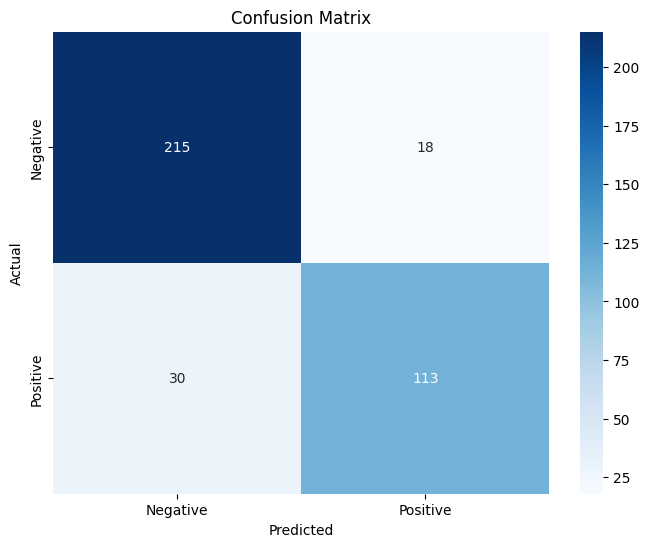

In [59]:


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming df is your DataFrame and it has been preprocessed
df = df.dropna()  # Drop rows with missing values

# Drop irrelevant columns if they exist
columns_to_drop = ['PatientID', 'DoctorInCharge']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get absolute correlation values for the 'Diagnosis' column
correlation_with_target = correlation_matrix['Diagnosis'].abs()

# Select features with correlation greater than a threshold (e.g., 0.2)
high_correlation_features = correlation_with_target[correlation_with_target > 0.1].index
selected_features = high_correlation_features.drop('Diagnosis')
print("Selected features:", selected_features)

# Identify categorical and numerical columns among selected features
categorical_features = list(set(['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel']) & set(selected_features))

numerical_features = list(set(selected_features) - set(categorical_features))

# Preprocess the data: one-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Transform the features
X = preprocessor.fit_transform(df[selected_features])
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).clone().detach().to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).clone().detach().to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).clone().detach().to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).clone().detach().to(device)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_dim = X_train.shape[1]
model = SimpleNN(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model

model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    test_outputs = model(X_test)
    
    # Convert outputs to binary predictions
    train_predicted = (train_outputs > 0.5).float()
    test_predicted = (test_outputs > 0.5).float()

    train_accuracy = accuracy_score(y_train.cpu(), train_predicted.cpu())
    test_accuracy = accuracy_score(y_test.cpu(), test_predicted.cpu())

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test.cpu(), test_predicted.cpu())

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Selected features: Index(['Hypertension', 'FastingBloodSugar', 'HbA1c', 'FrequentUrination'], dtype='object')
Epoch [10/100], Loss: 0.5900
Epoch [20/100], Loss: 0.5052
Epoch [30/100], Loss: 0.4411
Epoch [40/100], Loss: 0.4253
Epoch [50/100], Loss: 0.3868
Epoch [60/100], Loss: 0.3796
Epoch [70/100], Loss: 0.3616
Epoch [80/100], Loss: 0.3490
Epoch [90/100], Loss: 0.3485
Epoch [100/100], Loss: 0.3552
Train Accuracy: 0.9042
Test Accuracy: 0.8963


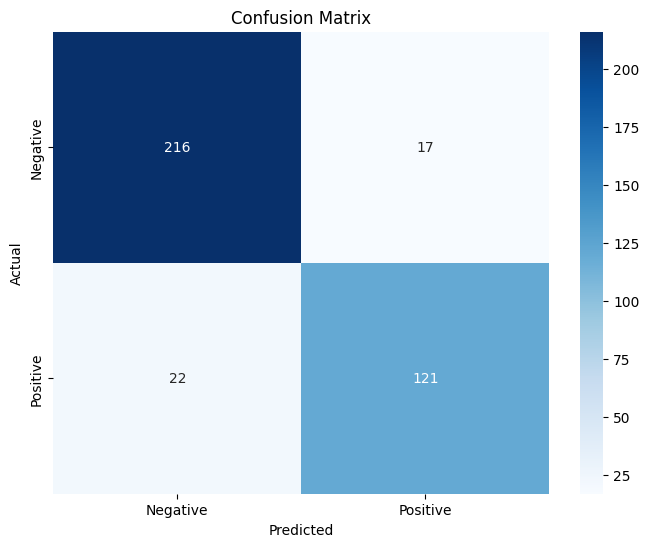

In [60]:


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming df is your DataFrame and it has been preprocessed
df = df.dropna()  # Drop rows with missing values

# Drop irrelevant columns if they exist
columns_to_drop = ['PatientID', 'DoctorInCharge']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get absolute correlation values for the 'Diagnosis' column
correlation_with_target = correlation_matrix['Diagnosis'].abs()

# Select features with correlation greater than a threshold (e.g., 0.2)
high_correlation_features = correlation_with_target[correlation_with_target > 0.1].index
selected_features = high_correlation_features.drop('Diagnosis')
print("Selected features:", selected_features)

# Identify categorical and numerical columns among selected features
categorical_features = list(set(['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel']) & set(selected_features))
numerical_features = list(set(selected_features) - set(categorical_features))

# Preprocess the data: one-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Transform the features
X = preprocessor.fit_transform(df[selected_features])
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).clone().detach().to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).clone().detach().to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).clone().detach().to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).clone().detach().to(device)

# Define a more complex neural network model with dropout and batch normalization
class ComplexNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))
        return x

input_dim = X_train.shape[1]
model = ComplexNN(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    test_outputs = model(X_test)
    
    # Convert outputs to binary predictions
    train_predicted = (train_outputs > 0.5).float()
    test_predicted = (test_outputs > 0.5).float()

    train_accuracy = accuracy_score(y_train.cpu(), train_predicted.cpu())
    test_accuracy = accuracy_score(y_test.cpu(), test_predicted.cpu())

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Confusion matrix for the test set
    cm = confusion_matrix(y_test.cpu(), test_predicted.cpu())

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()